In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from gptomics import plot

In [3]:
i = pd.DataFrame([1,2,3])
i * i


,0
0,1
1,4
2,9


In [102]:
apply_sleep = np.asarray(pd.read_csv(filepath_or_buffer="./apply_sleep"))
apply_speed = np.asarray(pd.read_csv(filepath_or_buffer="./apply_speed"))
produce_sleep = np.asarray(pd.read_csv(filepath_or_buffer="./produce_sleep"))
produce_speed = np.asarray(pd.read_csv(filepath_or_buffer="./produce_speed"))
network_sleep = np.asarray(pd.read_csv(filepath_or_buffer="./network_sleep"))
network_speed = np.asarray(pd.read_csv(filepath_or_buffer="./network_speed"))

In [38]:
print(apply_sleep)
print(apply_speed)

     sleep
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
..     ...
153    0.6
154    0.6
155    0.6
156    0.6
157    0.6

[158 rows x 1 columns]
        speed
0    1.376764
1    1.163954
2    1.183213
3    1.167528
4    1.162372
..        ...
153  0.816909
154  0.832507
155  0.819425
156  0.821571
157  0.815438

[158 rows x 1 columns]


In [5]:
produce_sleep

,sleep: 0.0
0,sleep: 0.0
1,sleep: 0.0
2,sleep: 0.0
3,sleep: 0.0
4,sleep: 0.0
...,...
187,sleep: 0.25
188,sleep: 0.25
189,sleep: 0.25
190,sleep: 0.25


In [6]:

len(produce_sleep) == len(produce_speed)

False

In [7]:

len(network_sleep) == len(network_speed)

True

In [97]:
class Linear_model:
  def __init__(self, m, b, learning_rate):
    self.m = m
    self.b = b
    self.learning_rate = learning_rate

  def ev(self, x_input):
    self.guess = self.m * x_input + self.b 

  def backwards(self, x_input, y_input):
    self.ev(x_input)
    self.error = (y_input - self.guess) ** 2
    # self.m_grad = 2 * self.m * (x_input ** 2) - 2 * y_input * x_input + 2 * x_input * self.b
    self.m_grad = 2 * (y_input - self.guess) * x_input
    # self.b_grad = 2 * self.b - y_input + 2 * self.m * x_input
    self.b_grad = 2 * (y_input - self.guess) 

  def backprop(self, x_input, y_input):
    self.backwards(x_input, y_input)
    self.m += (- self.m_grad.mean()) * self.learning_rate
    self.b += (- self.b_grad.mean()) * self.learning_rate
    
  def learn(self, x_input, y_input, rounds):
    halfway = int(len(y_input)/2)
    self.m = (y_input[halfway] - y_input[0])/ (x_input[halfway] - x_input[0])
    self.b = y_input[0] - x_input[0] * self.m 
    for i in range(1, rounds):
      self.backprop(x_input, y_input)
    self.ev(x_input)


In [24]:
data = pd.DataFrame(list(range(1,100)))
model = Linear_model(0,0, .00005)
model.ev(data)
model.guess

,0
0,0
1,0
2,0
3,0
4,0
...,...
94,0
95,0
96,0
97,0


In [95]:

model = Linear_model(0, 0 ,.0001)
model.learn(apply_sleep, apply_speed, 200)

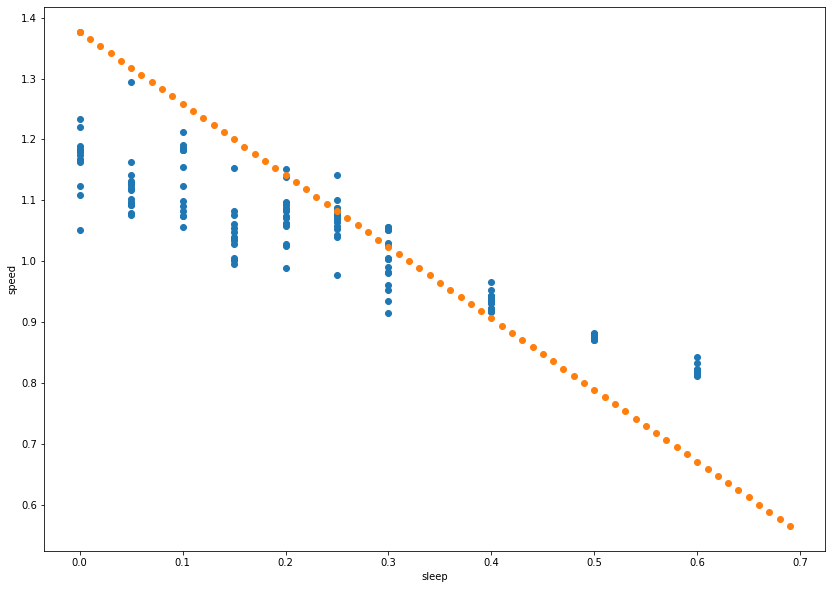

In [103]:
model = Linear_model(0, 0 ,.000001)
model.learn(apply_sleep, apply_speed, 200)

plt.figure(figsize=(14,10))
plt.xlabel("sleep")
plt.ylabel("speed")
plt.scatter(apply_sleep,apply_speed)

data = np.arange(0,.7,.01)
model.ev(data)
plt.scatter(data, model.guess)

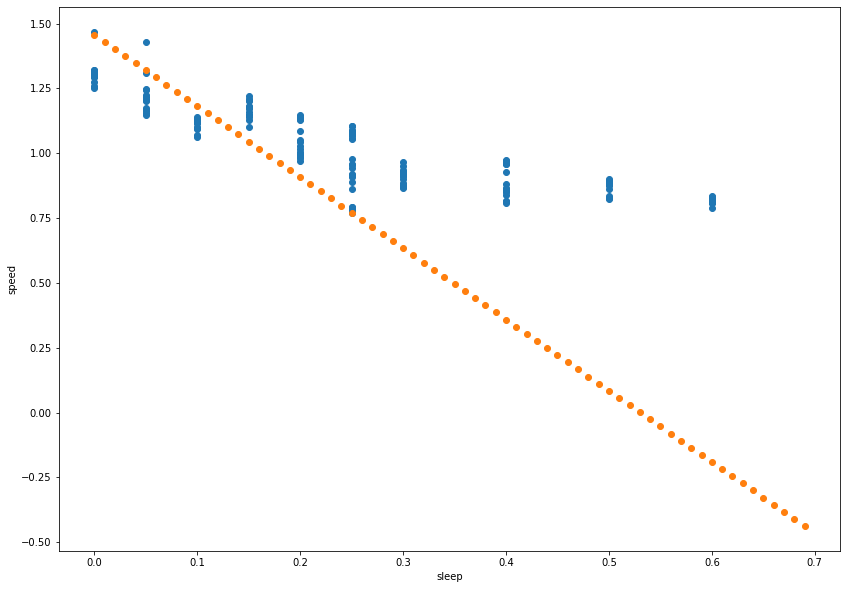

In [105]:

model = Linear_model(0, 0 ,.0001)
model.learn(produce_sleep, produce_speed, 200)

plt.figure(figsize=(14,10))
plt.xlabel("sleep")
plt.ylabel("speed")
plt.scatter(produce_sleep,produce_speed)

data = np.arange(0,.7,.01)
model.ev(data)
plt.scatter(data, model.guess)

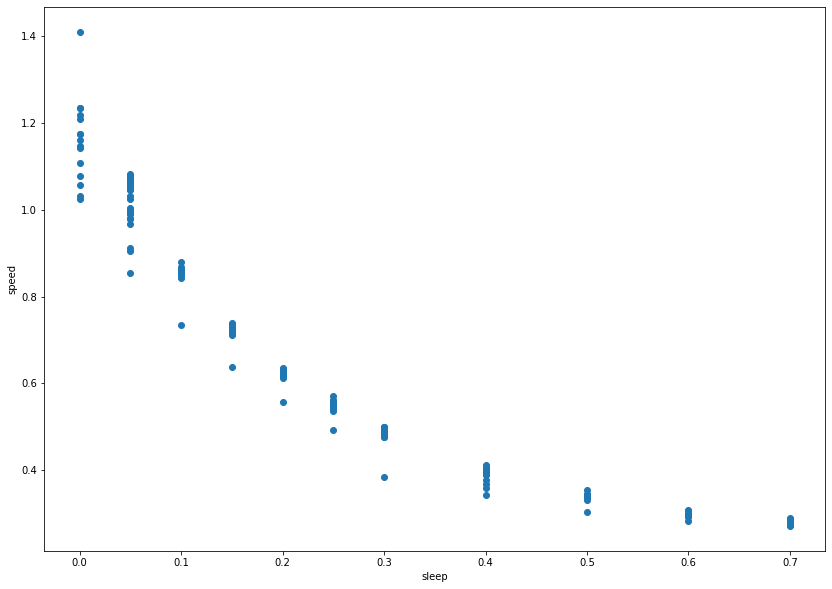

In [ ]:

plt.figure(figsize=(14,10))
plt.xlabel("sleep")
plt.ylabel("speed")
plt.scatter(network_sleep,network_speed)